In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
all_evaluations = pd.read_csv("./evaluations/all_evaluations.csv")
all_evaluations

,target,browser,player,codec,platform,user,data_points,mean,stdev,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,codec,FIREFOX,MPLAYER,*,Windows10,*,400,36.000000,5.385165,40.000000,32.500000,41.250000,41.250000,36.250000,23.750000,40.000000,32.500000,32.500000,40.000000
1,codec,FIREFOX,MPV,*,Windows10,*,400,32.375000,4.125000,33.750000,35.000000,35.000000,36.250000,33.750000,37.500000,23.750000,32.500000,27.500000,28.750000
2,codec,FIREFOX,VLC,*,Windows10,*,400,50.375000,3.710206,50.000000,48.750000,43.750000,50.000000,51.250000,51.250000,56.250000,55.000000,52.500000,45.000000
3,codec,CHROME,MPLAYER,*,Windows10,*,400,59.750000,5.471517,58.750000,51.250000,55.000000,65.000000,57.500000,60.000000,63.750000,71.250000,60.000000,55.000000
4,codec,CHROME,MPV,*,Windows10,*,400,63.750000,3.535534,58.750000,61.250000,70.000000,63.750000,61.250000,67.500000,62.500000,61.250000,62.500000,68.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,codec,EDGE,*,*,*,*,2400,41.000000,2.414870,39.166667,39.791667,39.583333,38.958333,45.625000,43.958333,38.541667,43.750000,39.166667,41.458333
197,codec,SAFARI,*,*,*,*,1200,54.333333,2.976762,60.416667,57.083333,51.666667,52.916667,56.666667,52.083333,52.500000,52.500000,50.833333,56.666667
198,codec,*,*,*,Windows10,*,3600,40.055556,1.490971,40.555556,38.055556,40.694444,38.750000,37.638889,42.222222,40.138889,41.666667,41.527778,39.305556
199,codec,*,*,*,Linux,*,3600,46.013889,1.041296,45.416667,45.694444,45.555556,45.555556,45.833333,45.277778,45.416667,45.277778,47.777778,48.333333


In [12]:
def filter_data(df, target, player, codec, browser, platform):
    if target is not None:
        df = df[all_evaluations["target"] == target]
    
    if codec is not None:
        df = df[df["codec"] == codec]

    if player is not None:
        df = df[df["player"] == player]
    
    if browser is not None:
        df = df[df["browser"] == browser]

    if platform is not None:
        df = df[df["platform"] == platform]

    return df

In [13]:
def transpose_data(df: pd.DataFrame):
    df_melted = df.melt(id_vars=["target", "browser", "player", "codec", "platform"], 
                   value_vars=["fold_1", "fold_2", "fold_3", "fold_4", "fold_5", "fold_6", "fold_7", "fold_8", "fold_9", "fold_10"], 
                   var_name="fold", value_name="value")
    return df_melted

In [14]:
browser_palette = {"CHROME": "C0", "FIREFOX": "C1", "EDGE": "C2", "SAFARI": "C3"}

# Plots

## Target = codec

### Each plot is separate browser

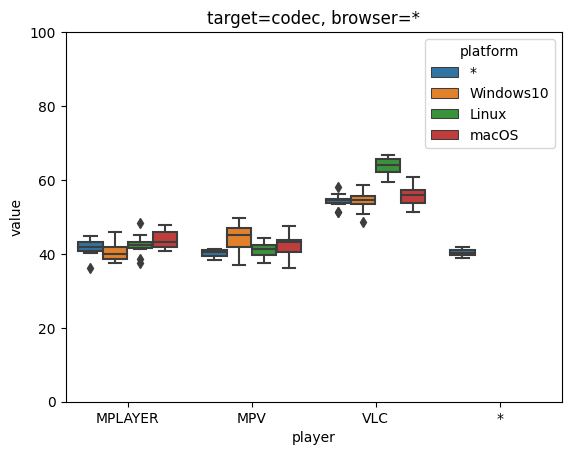

In [15]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=*")
plt.show()

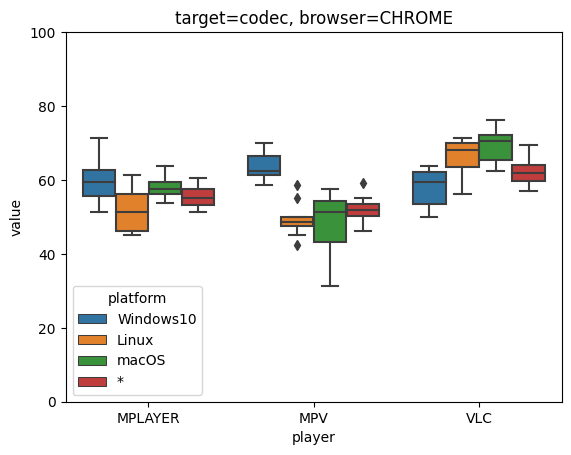

In [16]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=CHROME")
plt.show()

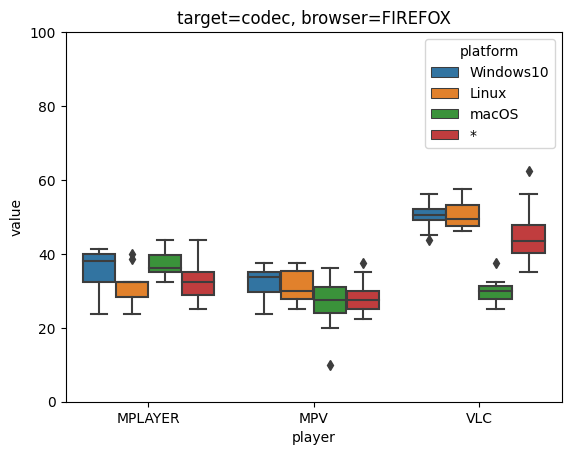

In [17]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=FIREFOX")
plt.show()

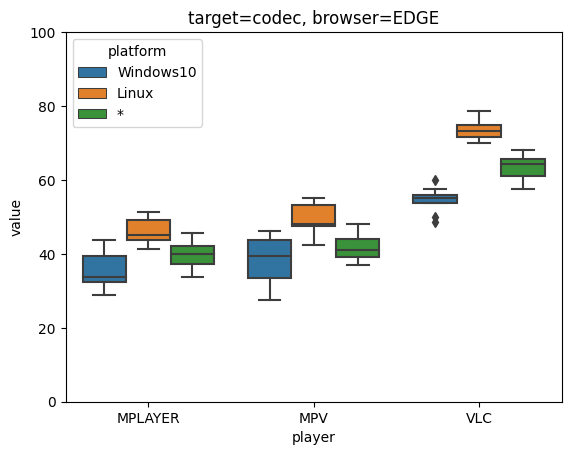

In [18]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=EDGE")
plt.show()

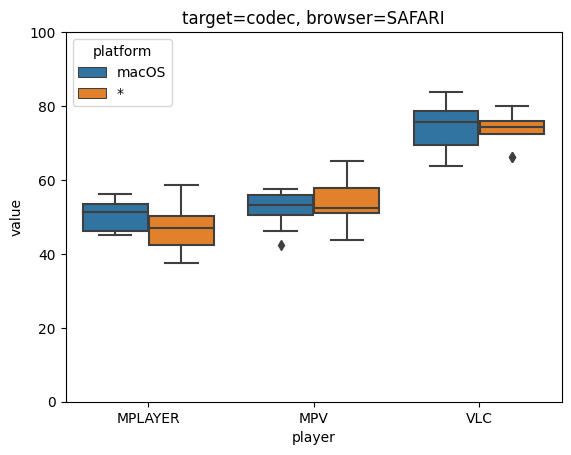

In [19]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=SAFARI")
plt.show()

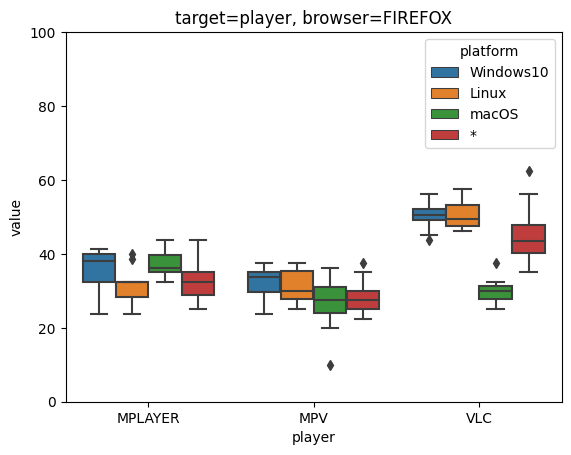

In [20]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

### Each plot is separate platform

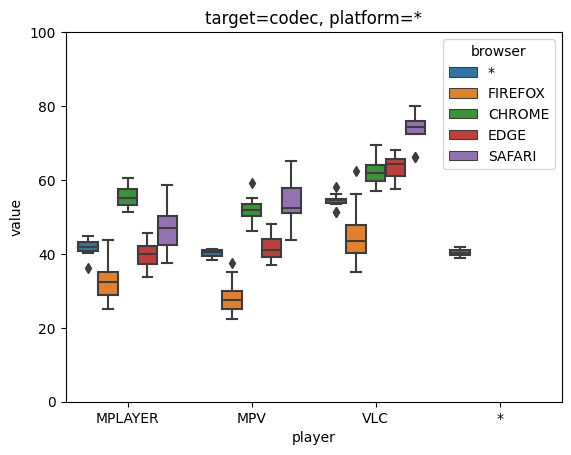

In [21]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=*")
plt.show()

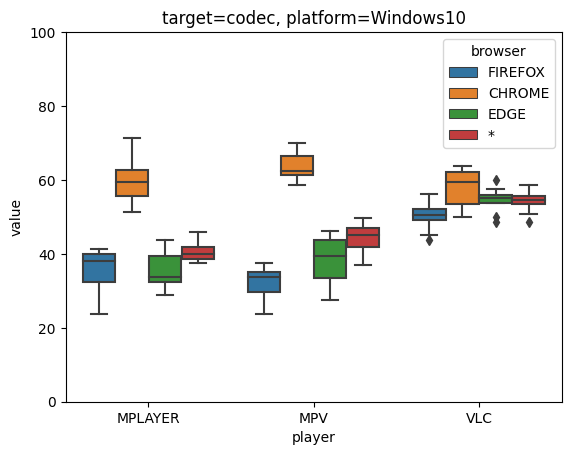

In [22]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Windows10"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Windows10")
plt.show()

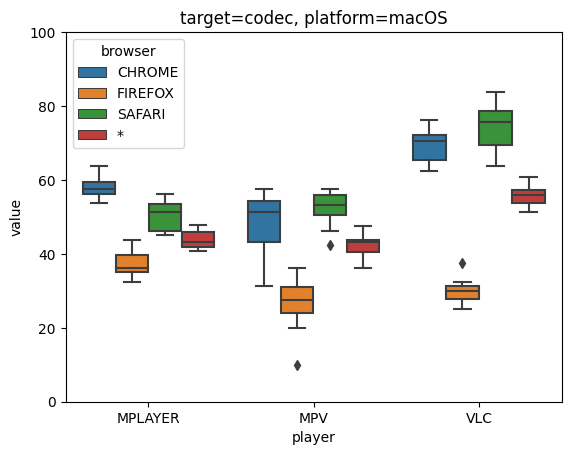

In [23]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="macOS"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=macOS")
plt.show()

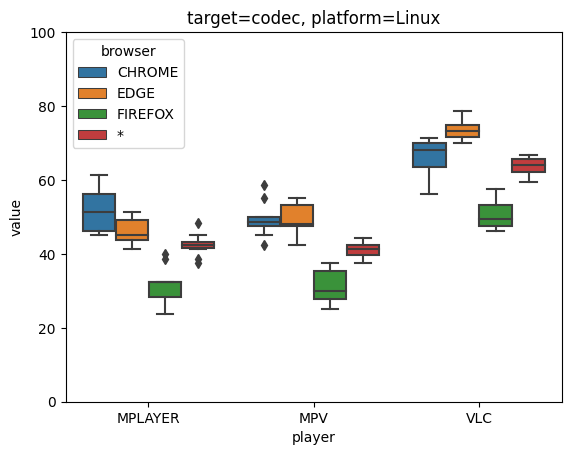

In [24]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Linux"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Linux")
plt.show()

## Target = player

### Each plot is separate browser

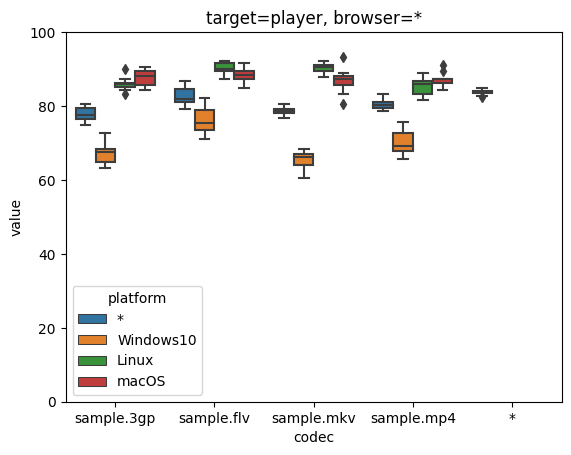

In [25]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=*")
plt.show()

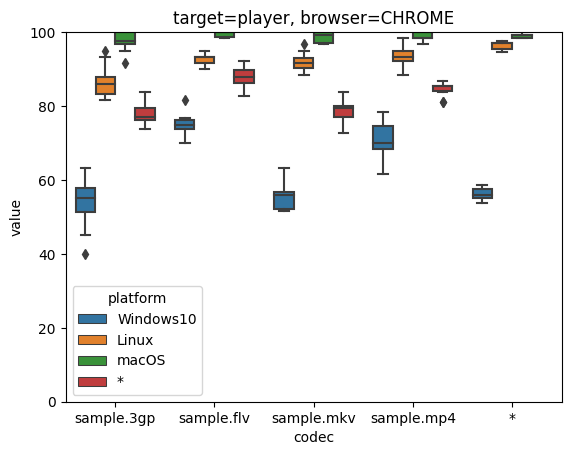

In [26]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=CHROME")
plt.show()

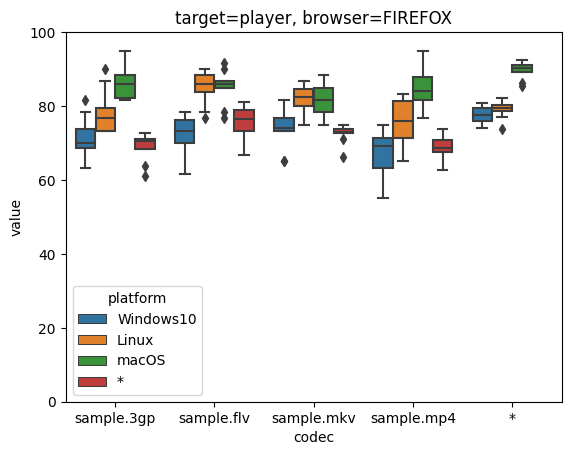

In [27]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

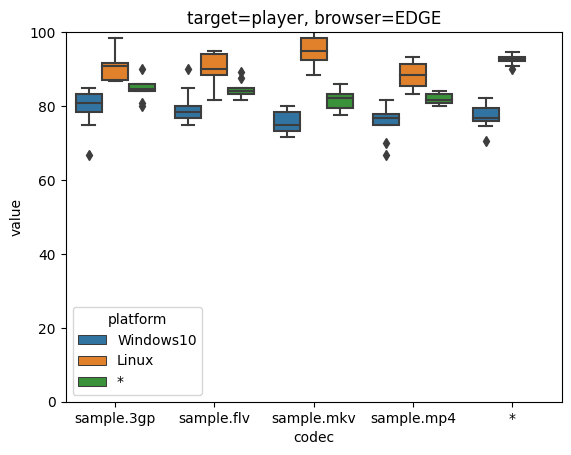

In [28]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=EDGE")
plt.show()

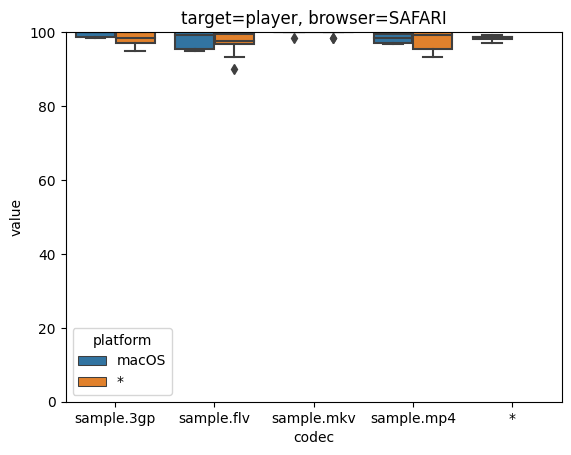

In [29]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=SAFARI")
plt.show()

### Each plot is a separate platform

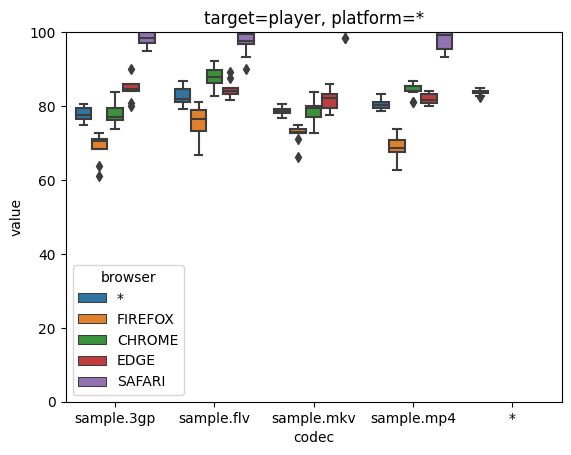

In [30]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=*")
plt.show()

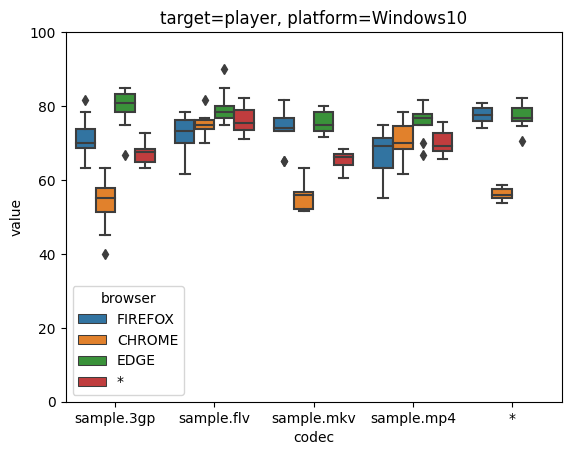

In [31]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Windows10"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Windows10")
plt.show()

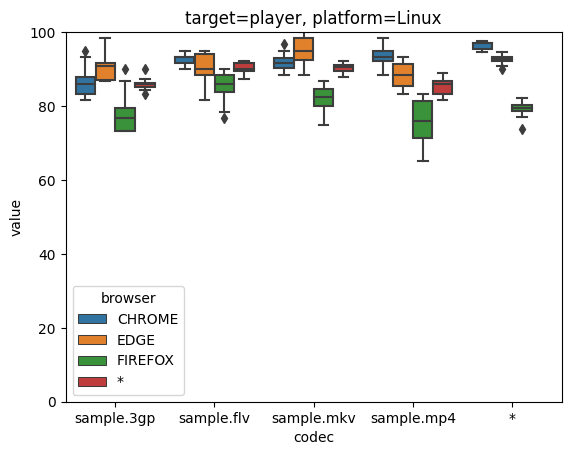

In [32]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Linux"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Linux")
plt.show()

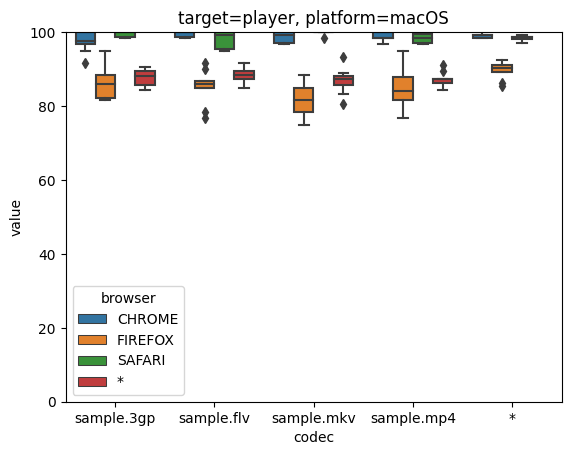

In [33]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="macOS"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=macOS")
plt.show()

# Experiments

Observation 0:
Variation is the smallest when player is fixed.

Observation 1:
VLC is more successful when predicting codec.

Observation 2:
Firefox is lower than other browsers when predicting codec.

Observation 3:
Different platforms perform similarly in general.

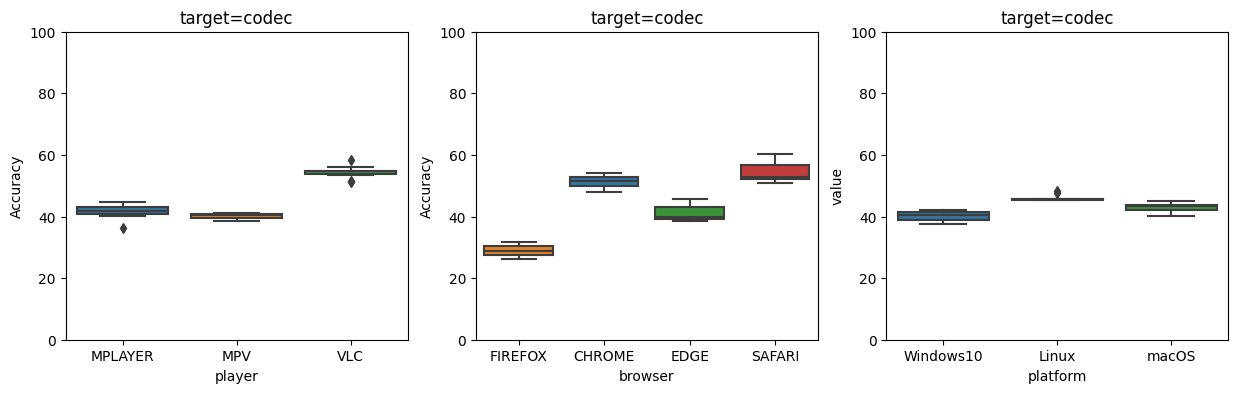

In [42]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

data1 = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec=None, browser="*", platform="*"))
data1 = data1[data1["player"] != "*"]
fig1 = sns.boxplot(ax=axs[0], data=data1, x="player", y="value")
fig1.set(ylim=(0,100), ylabel="Accuracy")
fig1.set_title("target=codec")

data2 = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec=None, browser=None, platform="*"))
data2 = data2[data2["browser"] != "*"]
fig2 = sns.boxplot(ax=axs[1], data=data2, x="browser", y="value", palette=browser_palette)
fig2.set(ylim=(0,100), ylabel="Accuracy")
fig2.set_title("target=codec")

data3 = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec=None, browser="*", platform=None))
data3 = data3[data3["platform"] != "*"]
fig3 = sns.boxplot(ax=axs[2], data=data3, x="platform", y="value")
fig3.set(ylim=(0,100))
fig3.set_title("target=codec")

plt.show()

Observation 4: Chrome on Windows does not reflect the usual trend of players (VLC being higher than others)

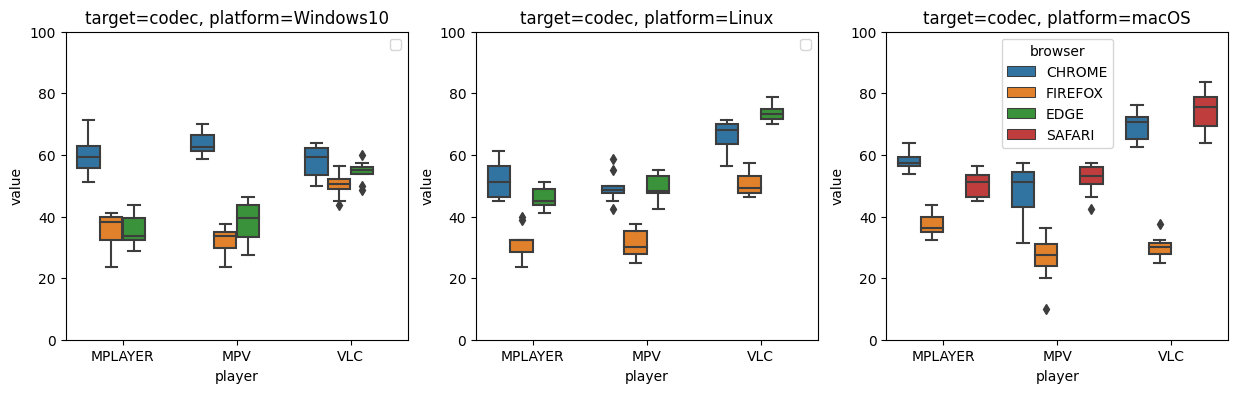

In [43]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Windows10"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[0], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.legend([])
boxplot.set_title("target=codec, platform=Windows10")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Linux"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[1], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.legend([])
boxplot.set_title("target=codec, platform=Linux")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="macOS"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[2], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=macOS")

plt.show()

Observation 5: Firefox and Edge are more similar on Windows, while Chrome and Edge are more similar on Linux, being greater than Firefox, when predicting codec.

Observation 6: Observation 5 cannot be observed when predicting player.

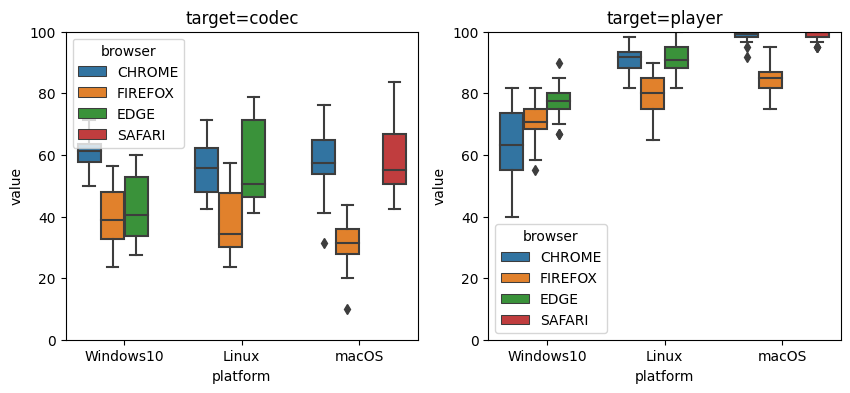

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))

data = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec="*", browser=None, platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0], data=data, x="platform", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1], data=data, x="platform", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player")

plt.show()

Observation 7: Firefox on macOS does not reflect the anomaly of VLC, while we can observe it in other experiments.

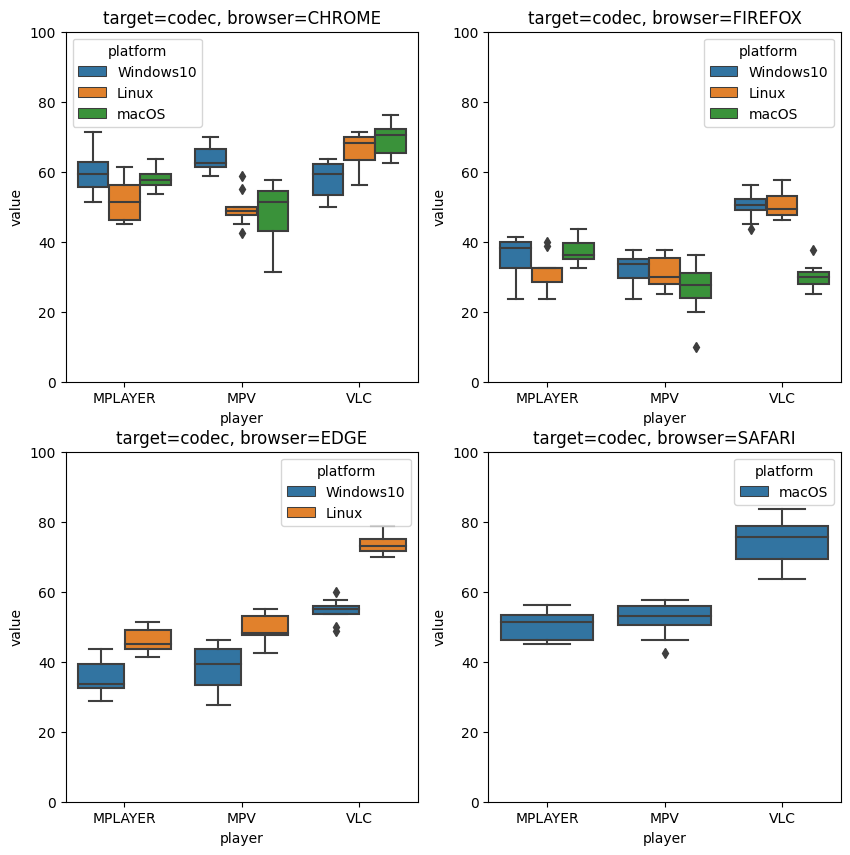

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="CHROME", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,0], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=CHROME")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,1], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=FIREFOX")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="EDGE", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,0], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=EDGE")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="SAFARI", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,1], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=SAFARI")
plt.show()

# target = player

Observation 8: Windows performs worse when predictiong player, compared to other platforms.

Observation 9: Variation is the smallest when codec is fixed.

Observation 10: Safari is insane.

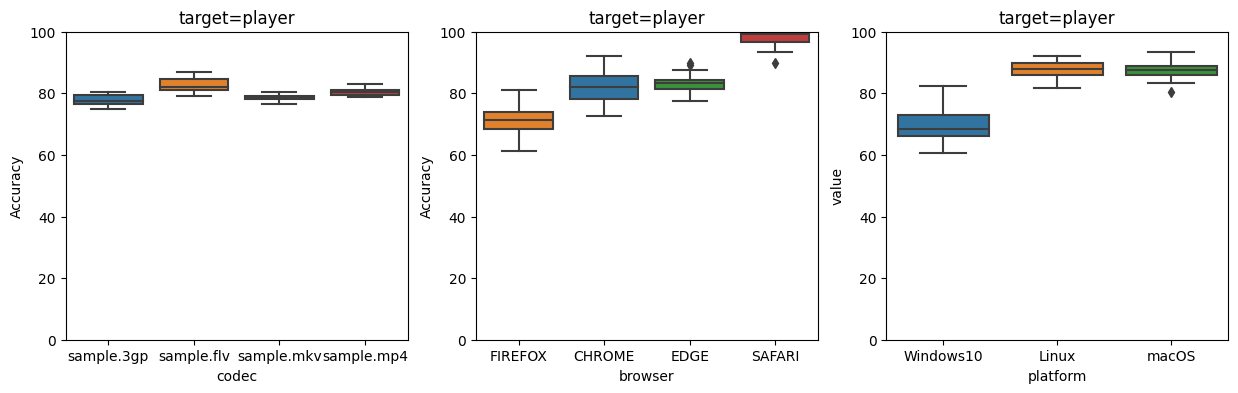

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

data1 = transpose_data(filter_data(all_evaluations, target="player", player=None, codec=None, browser="*", platform="*"))
data1 = data1[data1["codec"] != "*"]
fig1 = sns.boxplot(ax=axs[0], data=data1, x="codec", y="value")
fig1.set(ylim=(0,100), ylabel="Accuracy")
fig1.set_title("target=player")

data2 = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="*"))
data2 = data2[data2["browser"] != "*"]
fig2 = sns.boxplot(ax=axs[1], data=data2, x="browser", y="value", palette=browser_palette)
fig2.set(ylim=(0,100), ylabel="Accuracy")
fig2.set_title("target=player")

data3 = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
data3 = data3[data3["platform"] != "*"]
fig3 = sns.boxplot(ax=axs[2], data=data3, x="platform", y="value")
fig3.set(ylim=(0,100))
fig3.set_title("target=player")

plt.show()

Observation 11: Chrome is inconsistent with other players when the codec is .3gp and .mkv and we are trying to predict the player.

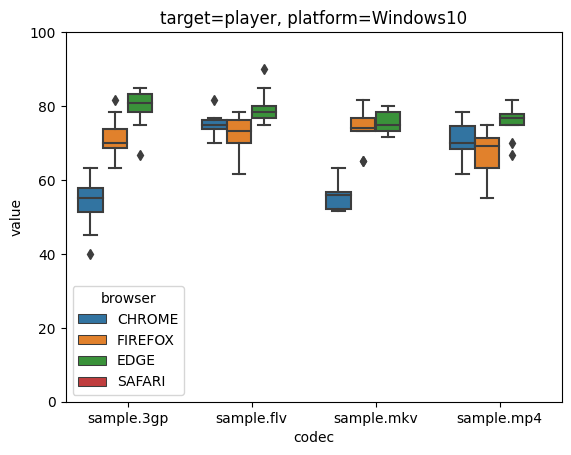

In [ ]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Windows10"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Windows10")
plt.show()

Observation 12: Safari is again insane.

Observation 13: Variation of Chrome is more than Firefox, followed by Edge and Safari.

Observation 14: Firefox on Windows and Linux perform pretty similar, while Firfox on macOS is more successful.

Observation 15: Chrome on Linux and macOS perform pretty similar, while Windows performs wawy worse than others.

Observation 16: Edge :D

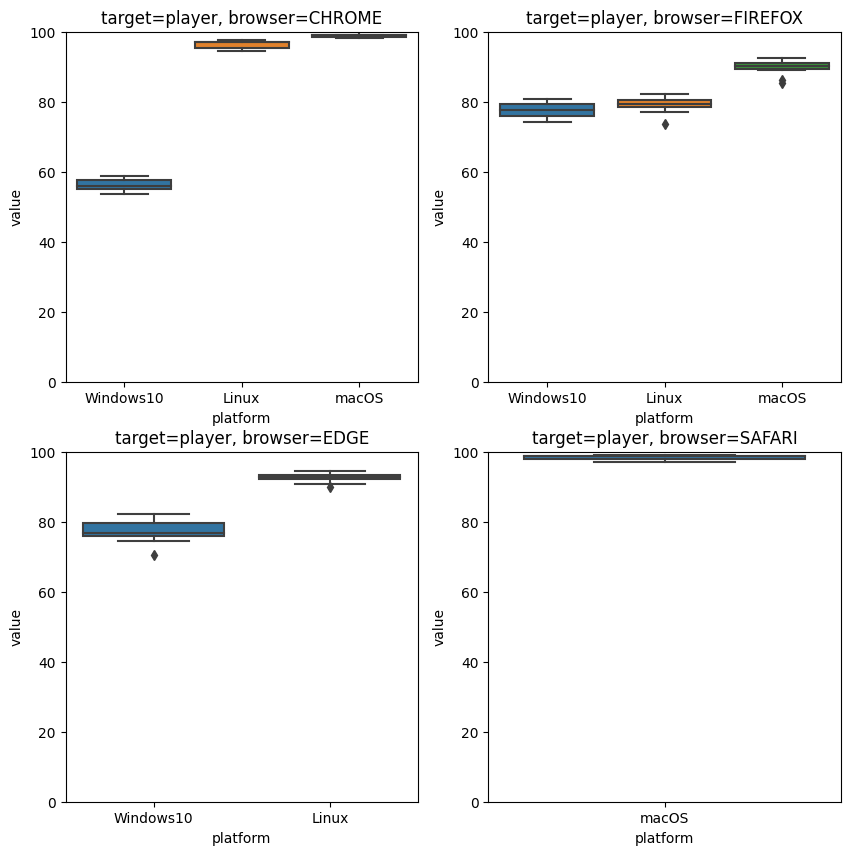

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="CHROME", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,0], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=CHROME")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="FIREFOX", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,1], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="EDGE", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,0], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=EDGE")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="SAFARI", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,1],data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=SAFARI")
plt.show()

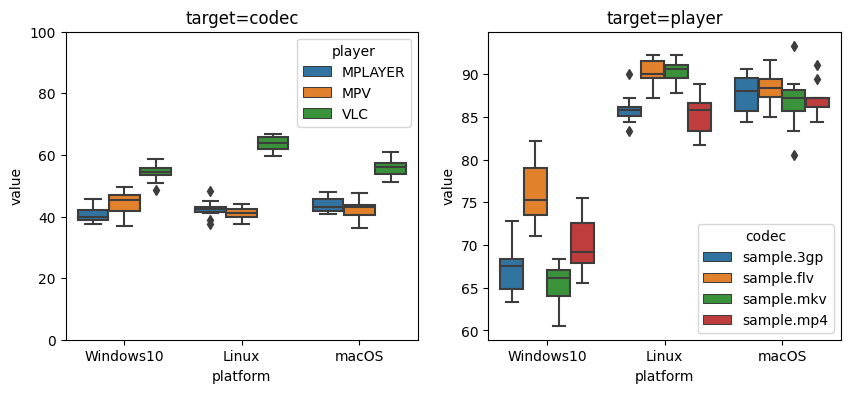

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="*", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0], data=data, x="platform", y="value", hue="player")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1], data=data, x="platform", y="value", hue="codec")
#boxplot.set(ylim=(0,100))
boxplot.set_title("target=player")
plt.show()